# **Session 3: Intro to ML | CART AND RANDOM FOREST**
**This demo shows the use of CART and Random Forest methods for Classification Prediction on TITANIC Data**


C Kaligotla | BUS 888




## Step 1: Load Libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load Data

In [2]:
titanic_df= pd.read_csv("https://www.dropbox.com/s/4tw0ttokdrl62qs/titanic_train.csv?dl=1")

In [3]:
titanic_df

,passengerId,survived,pclass,name,sex,age,sibSp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Step 3: Summarize and Visualize Data

In [4]:
print(titanic_df.columns)
print(titanic_df.info()) # Notice Object Data Types - potentially needs to be changed
titanic_df.describe() # Summary Stats - observe non numeric data is skipped

Index(['passengerId', 'survived', 'pclass', 'name', 'sex', 'age', 'sibSp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibSp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,passengerId,survived,pclass,age,sibSp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Step 4: Clean or Prepare  Data

In [5]:
# Convert categorical variables to numerical variables
titanic_df['sex'] = titanic_df['sex'].replace({'male': 0, 'female': 1})
titanic_df['embarked'] = titanic_df['embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    int64  
 5   age          714 non-null    float64
 6   sibSp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB
None


In [6]:
# Remove unnecessary columns
titanic_df = titanic_df.drop(['passengerId','name','ticket','cabin'], axis=1)

In [7]:
# Replace missing values with the mean of the column
titanic_df.fillna(titanic_df.mean(), inplace=True)

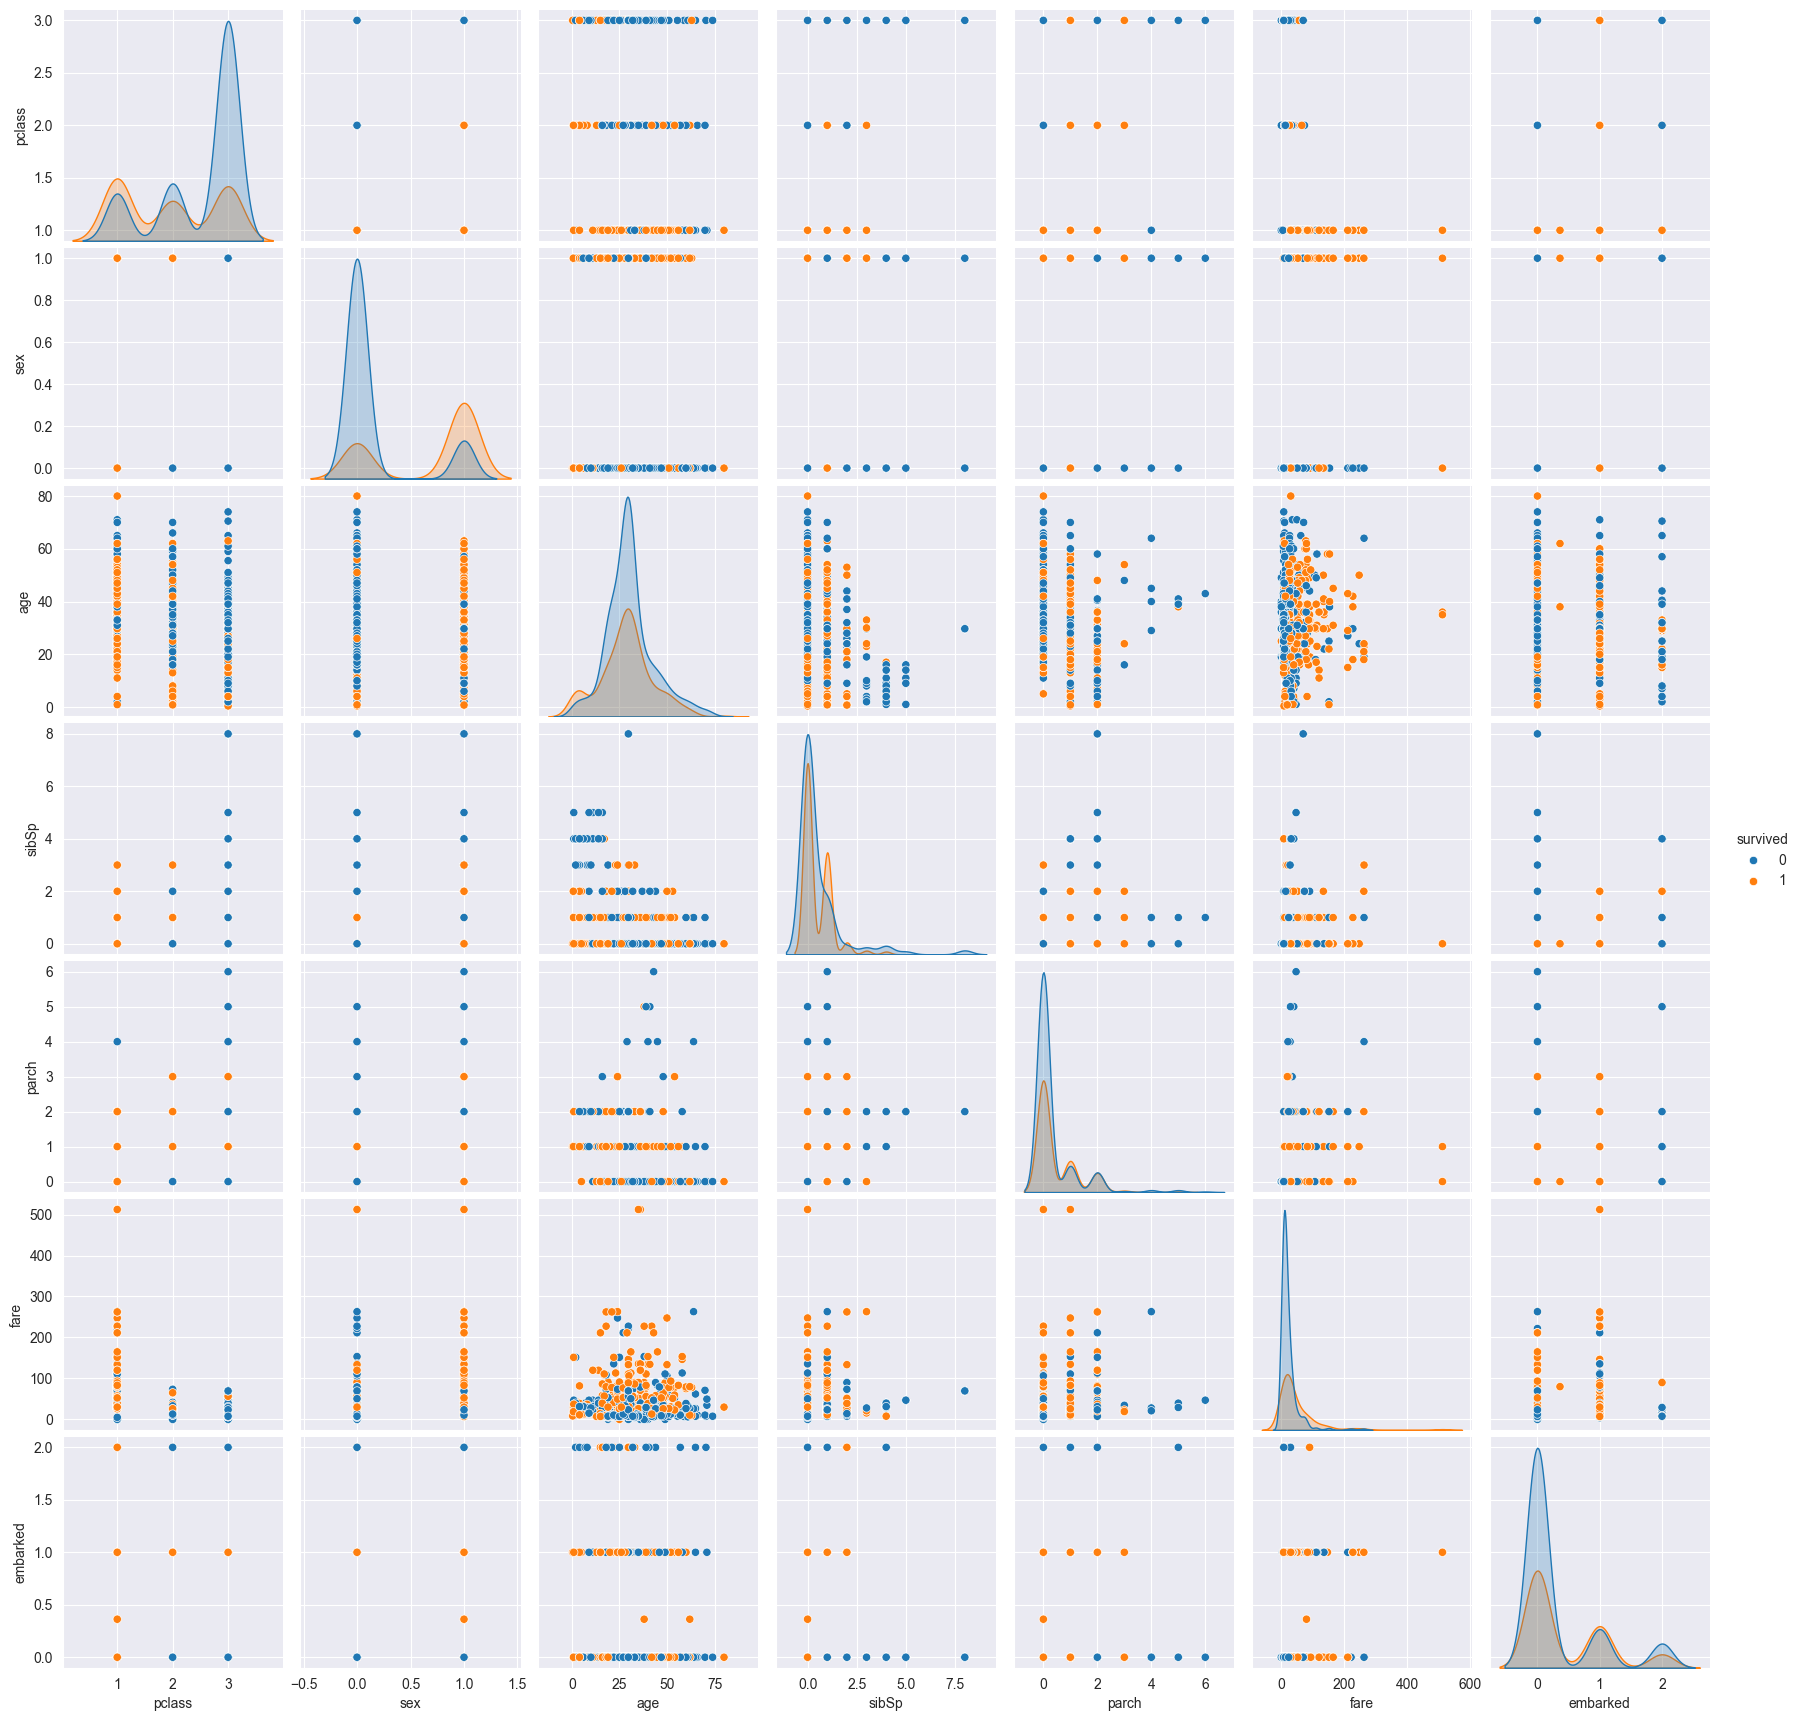

In [8]:
# Plot Distributions
g=sns.pairplot(titanic_df,hue="survived")

## Step 5: Split Data into Train-Test Sets

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('survived', axis=1),
                                                    titanic_df['survived'],
                                                    test_size=0.2,
                                                    random_state=42)


## Step 6: Build and Fit ML CART Model (called Classifier) on TRAIN DATA

In [10]:
# Create a decision tree classifier using the CART algorithm with max depth of 5
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)


In [12]:
# Fit the model to the training data
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Step 7: See the Model Performance on TEST DATA

In [13]:
# Predict the labels for the testing data
y_pred = dt.predict(X_test)

In [14]:
# Calculate the prediction performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F-1 Score:', f1)

Accuracy: 0.7988826815642458
Precision: 0.796875
Recall: 0.6891891891891891
F-1 Score: 0.7391304347826086


## Step 8: Analyze the Model / Explain the Model

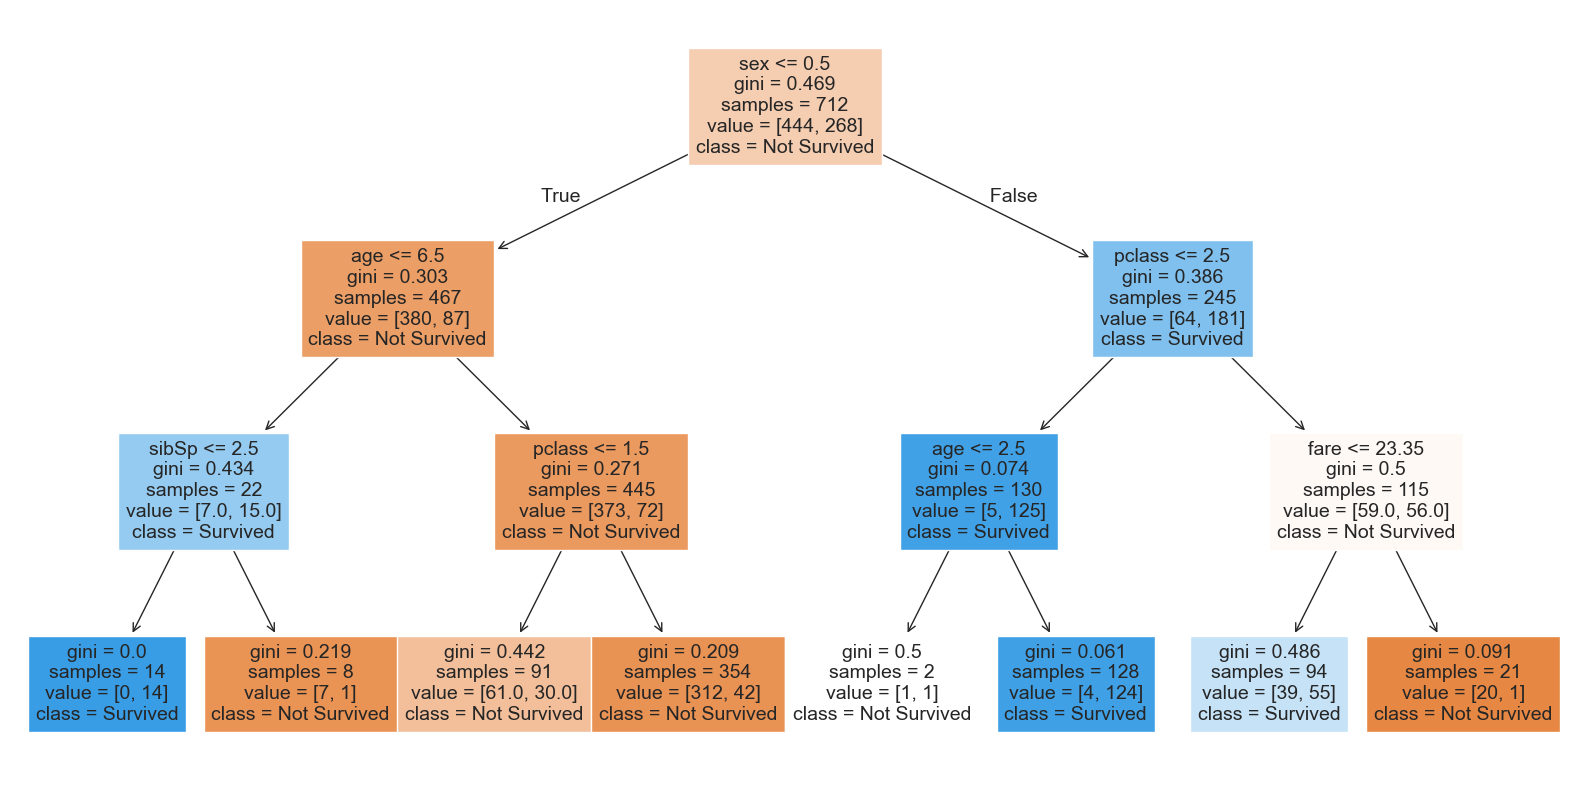

In [15]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

## Step 9: Improve Model Performance

Let's loop over different max_depth parameters and see how it affects performance measures

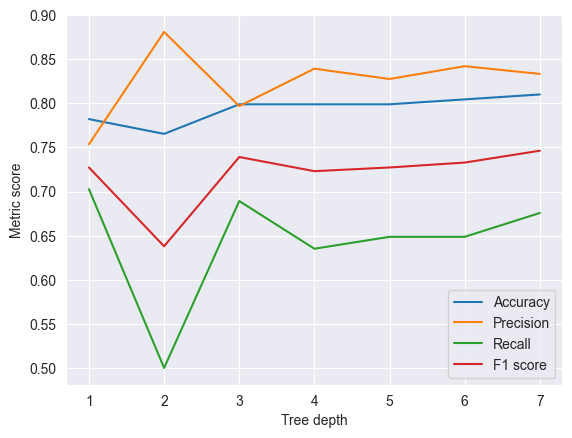

In [19]:
# Define lists to store the results
depths = list(range(1, 8))
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over different tree depths
for depth in depths:
    # Create a decision tree classifier using the CART algorithm with current max depth
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)

    # Fit the model to the training data
    dt.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = dt.predict(X_test)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot the results
plt.plot(depths, accuracy_scores, label='Accuracy')
plt.plot(depths, precision_scores, label='Precision')
plt.plot(depths, recall_scores, label='Recall')
plt.plot(depths, f1_scores, label='F1 score')
plt.xlabel('Tree depth')
plt.ylabel('Metric score')
plt.legend()
plt.show()

Now Let's plot the ROC and AUC Curves

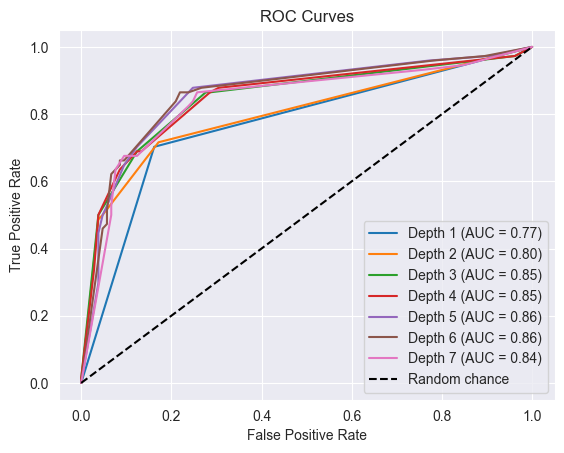

In [20]:
#import packages
from sklearn.metrics import roc_curve, auc

# Define lists to store the results
depths = list(range(1, 8))
auc_scores = []
fpr_list = []
tpr_list = []


# Loop over different tree depths
for depth in depths:
    # Create a decision tree classifier using the CART algorithm with current max depth
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)

    # Fit the model to the training data
    dt.fit(X_train, y_train)

    # Get probabilities for the positive class
    y_probs = dt.predict_proba(X_test)[:, 1]

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Compute the AUC
    roc_auc = auc(fpr, tpr)

    # Store the results
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_scores.append(roc_auc)


# Plot ROC curves for each depth
for i, depth in enumerate(depths):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Depth {depth} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


**What is the "Best" Model and Why?**

## RANDOM FOREST Classifier

Accuracy: 0.7877094972067039
Precision: 0.7727272727272727
Recall: 0.6891891891891891
F1-score: 0.7285714285714285
ROC AUC: 0.8687902187902188


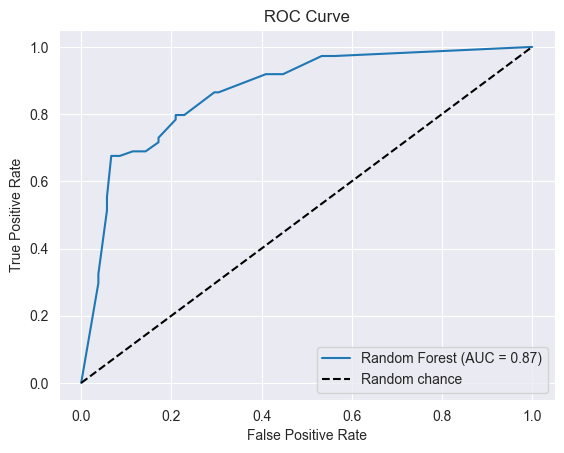

In [21]:
# prompt: I want to demonstrate a Random Forest Model. Please annotate the code like i have done above

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
import warnings

# ## Step 1: Load Libraries
warnings.filterwarnings('ignore')

# ## Step 2: Load Data
titanic_df= pd.read_csv("https://www.dropbox.com/s/4tw0ttokdrl62qs/titanic_train.csv?dl=1")

# ## Step 3: Summarize and Visualize Data
#print(titanic_df.columns)
#print(titanic_df.info()) # Notice Object Data Types - potentially needs to be changed
#titanic_df.describe() # Summary Stats - observe non numeric data is skipped

# ## Step 4: Clean or Prepare  Data
# Convert categorical variables to numerical variables
titanic_df['sex'] = titanic_df['sex'].replace({'male': 0, 'female': 1})
titanic_df['embarked'] = titanic_df['embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
#print(titanic_df.info())

# Remove unnecessary columns
titanic_df = titanic_df.drop(['passengerId','name','ticket','cabin'], axis=1)

# Replace missing values with the mean of the column
titanic_df.fillna(titanic_df.mean(), inplace=True)

# ## Step 5: Split Data into Train-Test Sets
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('survived', axis=1),
                                                    titanic_df['survived'],
                                                    test_size=0.2,
                                                    random_state=42)

# ## Step 6: Build and Fit Random Forest Model
# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)  # You can adjust n_estimators (# of trees)

# Fit the model to the training data
rf.fit(X_train, y_train)

# ## Step 7: Evaluate the Model
# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Calculate ROC AUC
y_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


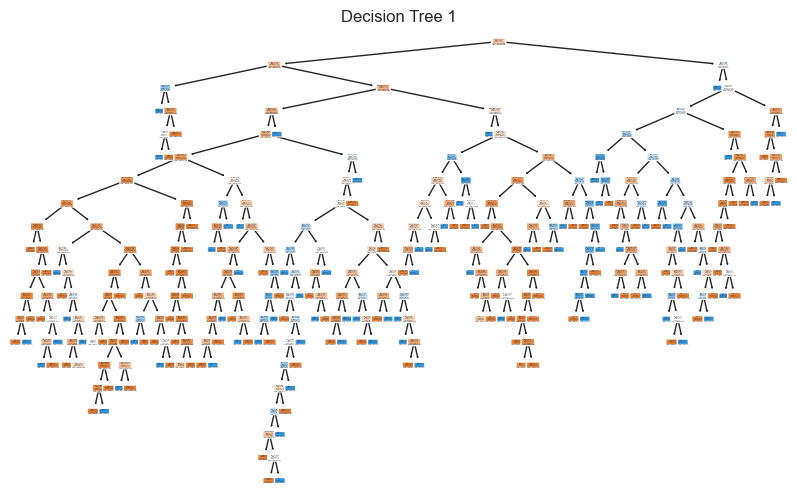

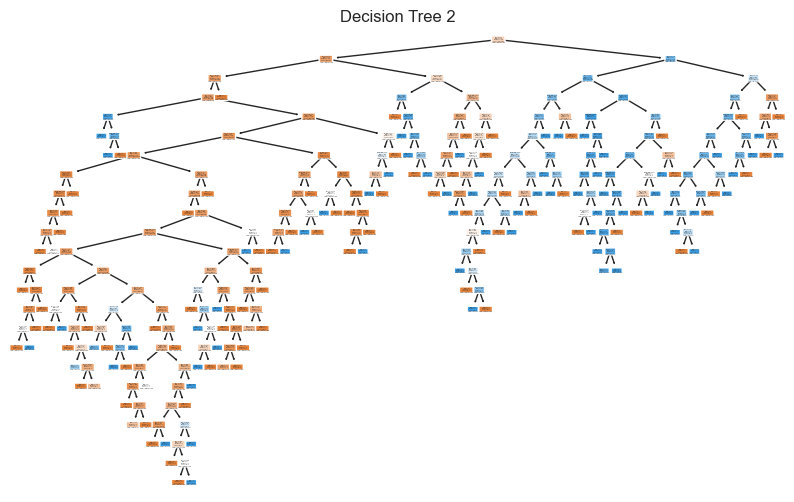

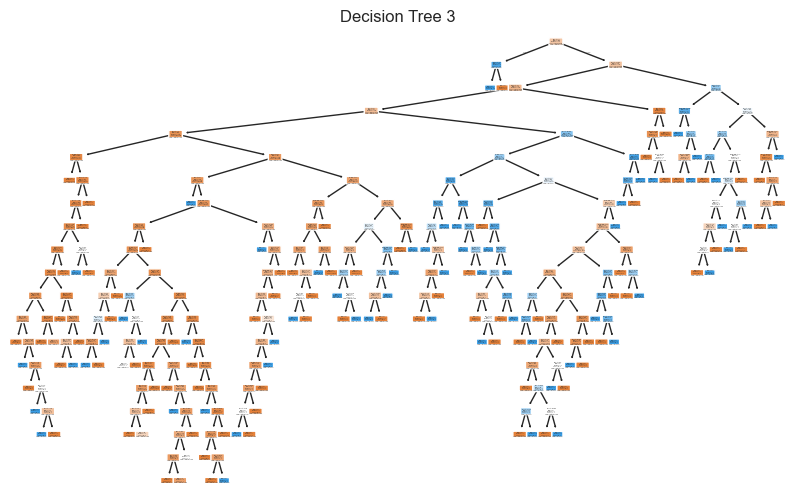

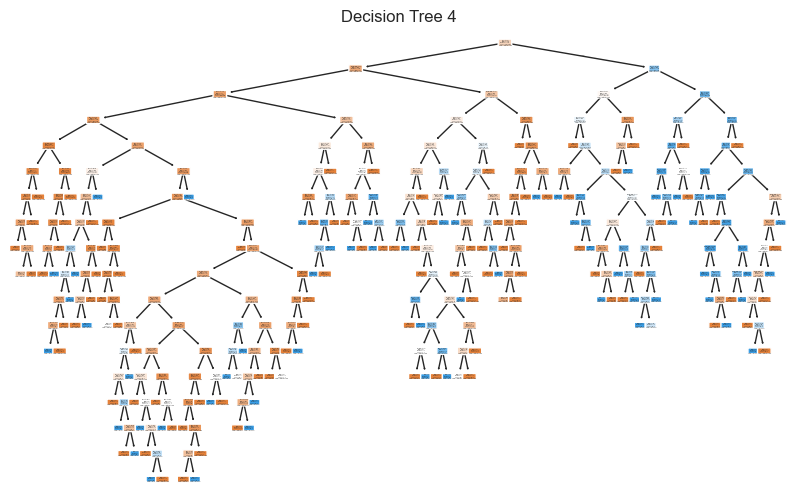

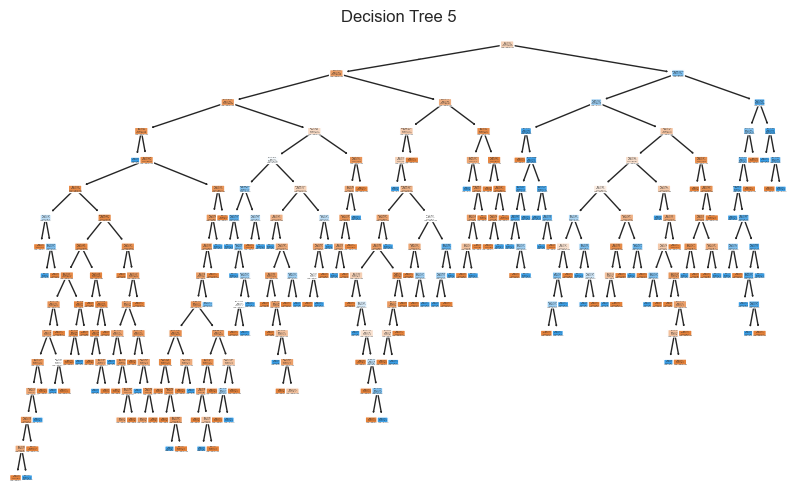

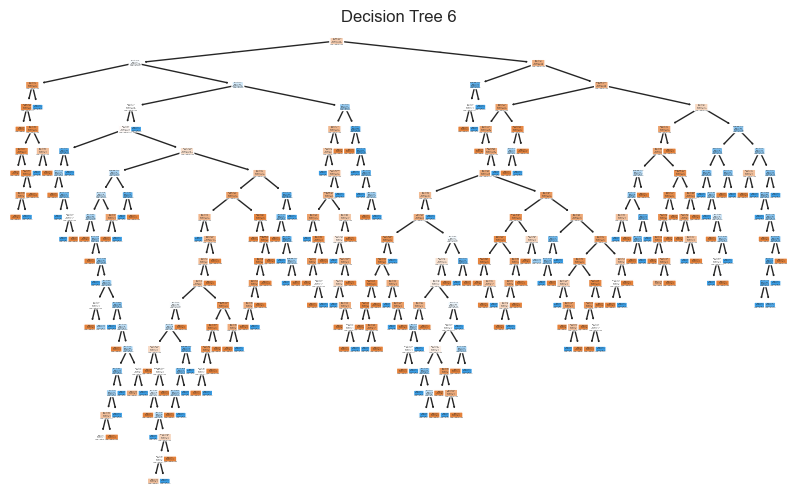

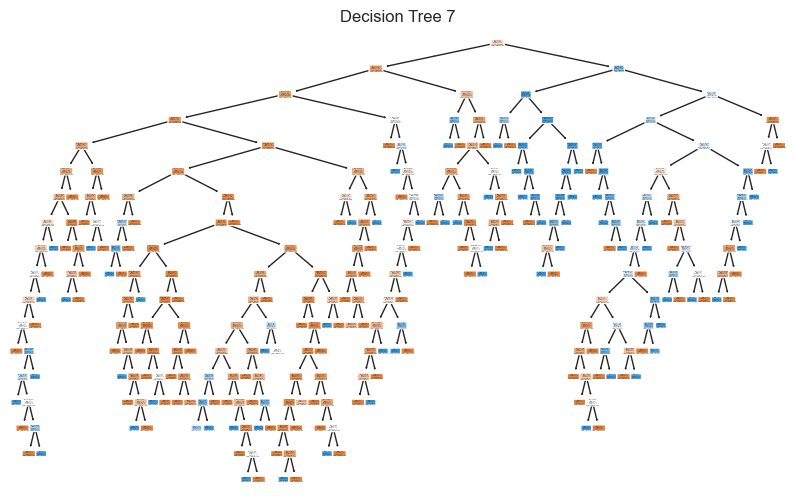

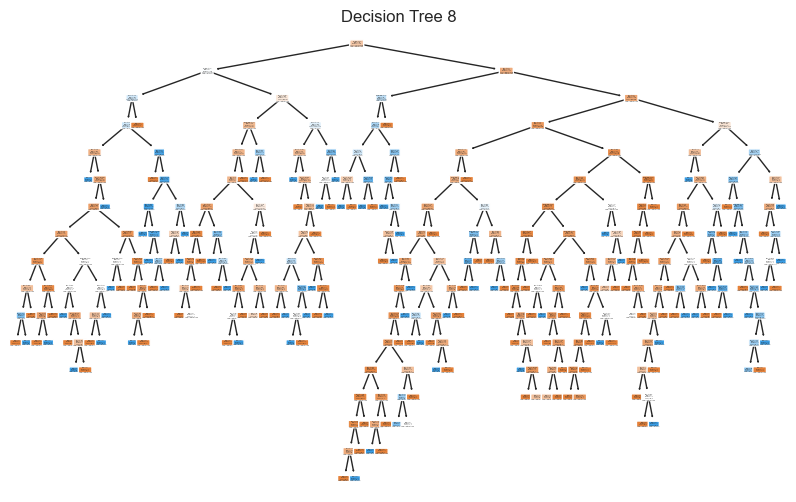

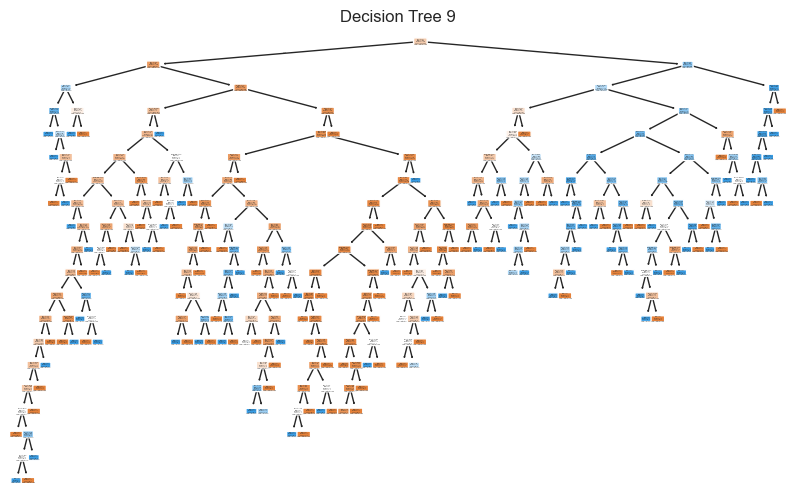

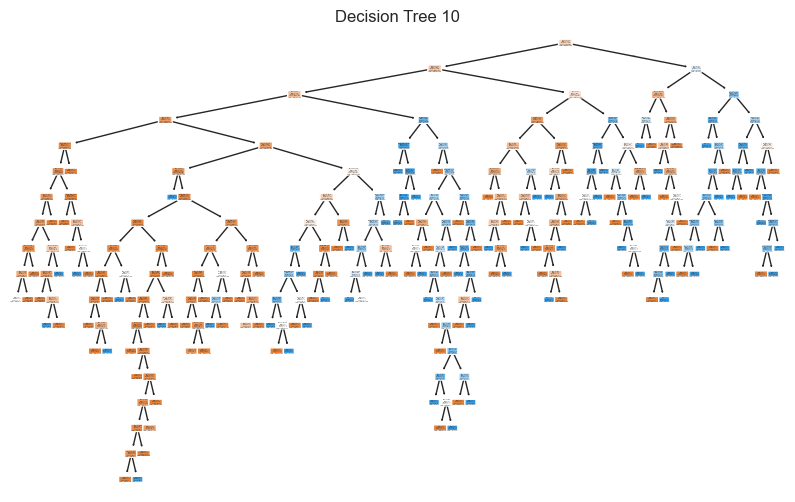

In [22]:
# prompt: plot the random forest - loop through each tree

# Assuming 'rf' is your trained RandomForestClassifier object
# from the previous code cell.

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

for i, tree in enumerate(rf.estimators_):
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plot_tree(tree, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()
